In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The graph of $x \mapsto \sin(x)$

Matplotlib is used for plotting functions

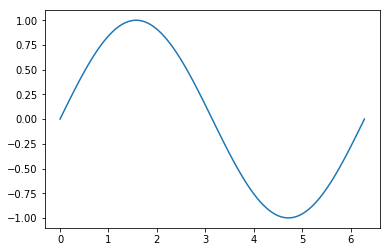

In [2]:
X = np.linspace(0, 2*np.pi, 100)
plt.plot(X, np.sin(X));

## Multiple curves

We can display the approximations to $\sin$
on the same plot like this



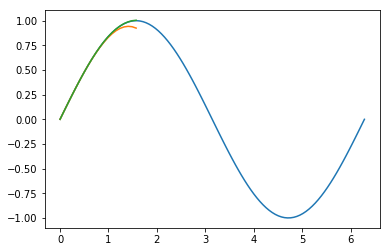

In [87]:
X = np.linspace(0, 2*np.pi, 100)
plt.plot(X, np.sin(X));

T = np.linspace(0,np.pi/2, 20)
Y = T - T**3/6 
plt.plot(T, Y)

Y = T - T**3/6 + T**5/120  
plt.plot(T, Y);

## Basic plot style

and we can change the style of the curves 
by adding an argument like "rx"


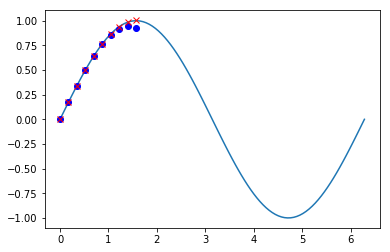

In [86]:
X = np.linspace(0, 2*np.pi, 100)
plt.plot(X, np.sin(X));

T = np.linspace(0,np.pi/2, 10)
Y = T - T**3/6 
plt.plot(T, Y,'bo')

Y = T - T**3/6 + T**5/120  
plt.plot(T, Y, 'rx');

## More sophistocated - aspect ratio

This is how I would calculate the approximations.

- calculate an array (vector) of coefficients
- calculate a matrix of odd powers, a sort of Van der Monde matrix.
- do a matrix multiplication to get the values

Do you see why I take the interval $[0, \pi]$ ?

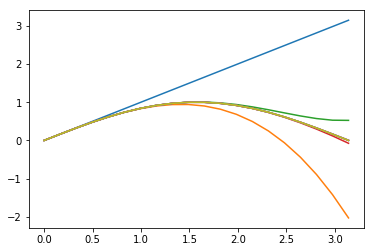

In [101]:
N = 10
T = np.linspace(0, np.pi, 20)

coeffs = [(-1)**(n+1) /np.math.factorial(2*n - 1) for n in range(1,N)]
odd_powers = np.stack([ T**(2*n - 1 ) for n in range(1,N)] )

for k in range(1,N):
    Y = np.dot( odd_powers[:k].T, coeffs[:k])
    plt.plot(T,Y)
    


## Problem of aspect ratio

- horizontal distance = $\pi/2$
- vertical distance = 5

but the width is bigger than the height.

We can fix this using `plt.subplots`

- the option we want is `ax.set_aspect('equal')`



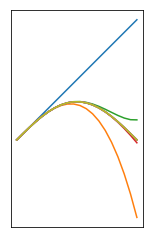

In [110]:
fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for k in range(1,N):
    Y = np.dot( odd_powers[:k].T, coeffs[:k])
    #I have to change this from plt.plot
    ax.plot(T,Y)
    
# this saves the figure to a file
# fn always means *file name*
fn = './tt.png'
fig.savefig(fn)

## Multiple figures on one plot

- read the image back to `im`
- display it multiple times

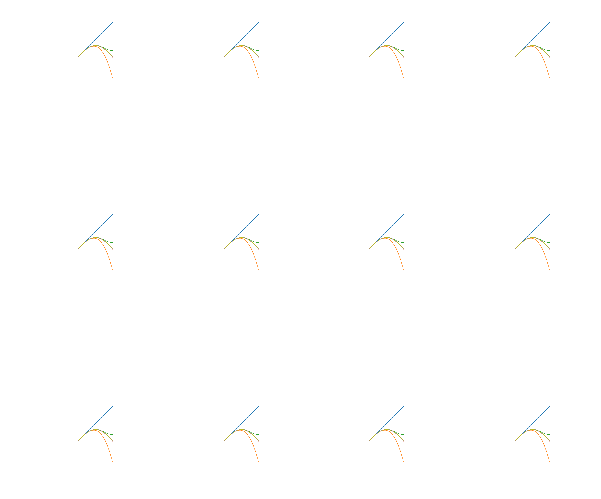

In [128]:
import imageio

fn = './tt.png'
im = imageio.imread(fn)

num_rows , num_cols = 3, 4

fig, axs = plt.subplots(num_rows, num_cols)
[axi.set_axis_off() for axi in axs.ravel()]
fig.set_size_inches(10,10)

for k in range(num_cols * num_rows):
    axs[k % num_rows , k // num_rows].imshow(im )
    
plt.axis('off');

## Flattening an ellipse

we can illustrate changes by using multiple plots
like this

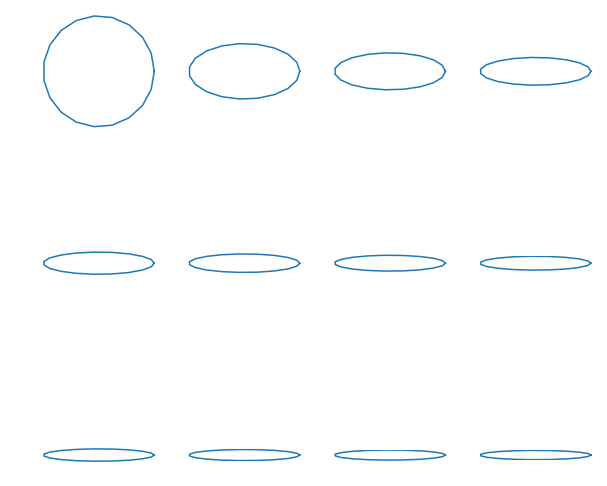

In [16]:
num_rows , num_cols = 3, 4

fig, axs = plt.subplots(num_rows, num_cols)

[ax.set_axis_off() for ax in axs.ravel()]
[ax.set_aspect('equal') for ax in axs.ravel()]

fig.set_size_inches(10,10)

# make a circle
T = np.linspace(0, 2*np.pi, 20)
X = np.cos(T)
Y = np.sin(T)

for k in range(num_cols * num_rows):
    axs[k // num_cols , k % num_cols].plot(X, Y/(k+1) )
    
plt.axis('off');

## Scatter plots

we often want to represent data as a cloud of points
to do this we use `plt.scatter'

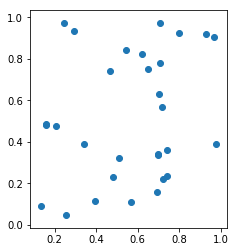

In [7]:
np.random.seed(19680801)

X, Y = np.random.rand(2, 30)

fig, ax = plt.subplots()
ax.scatter(X, Y,)
ax.set_aspect('equal')
plt.show()

## The marker

the blue dot is called the marker
we can change this by copying 
the [examples like this](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_custom_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-custom-symbol-py).


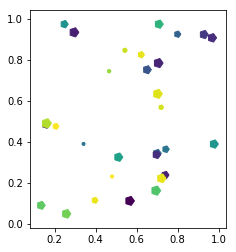

In [6]:
np.random.seed(19680801)

# pentagon
rx, ry = 1., 1.
area = rx * ry * np.pi
theta = np.linspace(0, 2 * np.pi + 0.01, 6)
verts = np.column_stack([rx / area * np.cos(theta), 
                         ry / area * np.sin(theta)])

x, y, s, c = np.random.rand(4, 30)
s *= 10**2.

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x, y, s, c, marker=verts)
plt.show()

# Exercises

[ROMMA](https://www.romma.fr/)est une association bénévole à but non lucratif
aui tient des stations meteo dans la region.

https://www.romma.fr/station_24.php?id=4&tempe=1


In [3]:
import pickle

In [6]:
data = pickle.load(open('./13Aug.pkl','rb'))

In [7]:
data

{3: {'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972930e+12,
         1.5972936e+12, 1.5972942e+12]),
  'temp': array([11.6, 11.6, 11.8, ..., 13.8, 14.2, 14.7]),
  'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
  'intenspluie': array([nan, nan, nan, ..., nan, nan, nan]),
  'pression': array([1017. , 1017. , 1017. , ..., 1011.1, 1011.1, 1011. ]),
  'hum': array([90., 90., 90., ..., 66., 64., 62.]),
  'rad': array([ 27. ,  30.5, 150. , ...,   0. ,   0.5,   6.5]),
  'rafale': array([nan, nan, nan, ..., nan, nan, nan]),
  'vent': array([nan, nan, nan, ..., nan, nan, nan]),
  'ventdir': array([nan, nan, nan, ..., nan, nan, nan])},
 5: {'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972936e+12,
         1.5972942e+12, 1.5972948e+12]),
  'temp': array([12.7, 12.7, 12.8, ..., 17.8, 17.8, 17.6]),
  'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
  'intenspluie': array([nan, nan, nan, ..., nan, nan, nan]),
  'pression': array([1021.1, 1021.2, 1021.2, .

In [9]:
data[5]

{'time': array([1.5946164e+12, 1.5946170e+12, 1.5946176e+12, ..., 1.5972936e+12,
        1.5972942e+12, 1.5972948e+12]),
 'temp': array([12.7, 12.7, 12.8, ..., 17.8, 17.8, 17.6]),
 'pluie': array([0., 0., 0., ..., 0., 0., 0.]),
 'intenspluie': array([nan, nan, nan, ..., nan, nan, nan]),
 'pression': array([1021.1, 1021.2, 1021.2, ..., 1015.9, 1015.8, 1015.5]),
 'hum': array([97., 97., 98., ..., 96., 96., 96.]),
 'rad': array([23., 28., 78., ...,  0.,  0., 10.]),
 'rafale': array([ 0.,  0.,  0., ..., 10.,  6., 11.]),
 'vent': array([0. , 0. , 0. , ..., 3.5, 4. , 2.5]),
 'ventdir': array([292.5, 292.5, 292.5, ..., 292.5,  22.5, 292.5])}